Utilisation de l'api whiskyhunter et manipulation de fichiers

In [ ]:
%pip install requests pandas matplotlib

Cellule du module "logic.py"

In [ ]:
# logic.py

import requests
import pandas as pd

def fetch_base_data(endpoint):
    response = requests.get(endpoint)
    if response.status_code == 200:
        return pd.DataFrame(response.json())
    else:
        raise Exception(f"Erreur lors de la requête de base : {response.status_code}")

def fetch_detailed_data(slugs):
    df_detailed = pd.DataFrame()
    for slug in slugs:
        response = requests.get(f'https://whiskyhunter.net/api/distillery_data/{slug}/')
        if response.status_code == 200:
            df_temp = pd.DataFrame(response.json())
            df_temp['slug'] = slug
            df_detailed = pd.concat([df_detailed, df_temp], ignore_index=True)
        else:
            print(f"Erreur pour le slug {slug}")
    return df_detailed.set_index(['slug', 'dt'])

def filter_base_data(df_base, df_detailed):
    slugs_in_detailed = df_detailed.index.get_level_values('slug').unique()
    return df_base[df_base['slug'].isin(slugs_in_detailed)]


Cellule du module "main.py"

Erreur pour le slug aberargie
Erreur pour le slug aioi_unibio_co._ltd.
Erreur pour le slug ardenistile
Erreur pour le slug benachie
Erreur pour le slug ben_wyvis_/_ferintosh
Erreur pour le slug broombrae
Erreur pour le slug clutha
Erreur pour le slug corry_(broadford)
Erreur pour le slug falkirk__company
Erreur pour le slug gartbreck
Erreur pour le slug glenfyne_(glendarroch_glenglip)
Erreur pour le slug glenramskill
Erreur pour le slug gyokusendo_shuzo
Erreur pour le slug hikari
Erreur pour le slug isle_of_harris_distillers_ltd.
Erreur pour le slug kimbland
Erreur pour le slug lochindaal_(closed)
Erreur pour le slug meadownburn
Erreur pour le slug miyashita_sake_brewery
Erreur pour le slug mossfield
Erreur pour le slug ncn'ean
Erreur pour le slug nishinomiya
Erreur pour le slug north_uist__co.
Erreur pour le slug octomore_(closed)
Erreur pour le slug osuzuyama
Erreur pour le slug port_charlotte_(closed)
Erreur pour le slug rokkosan
Erreur pour le slug shinzato_shuzo
Erreur pour le slu

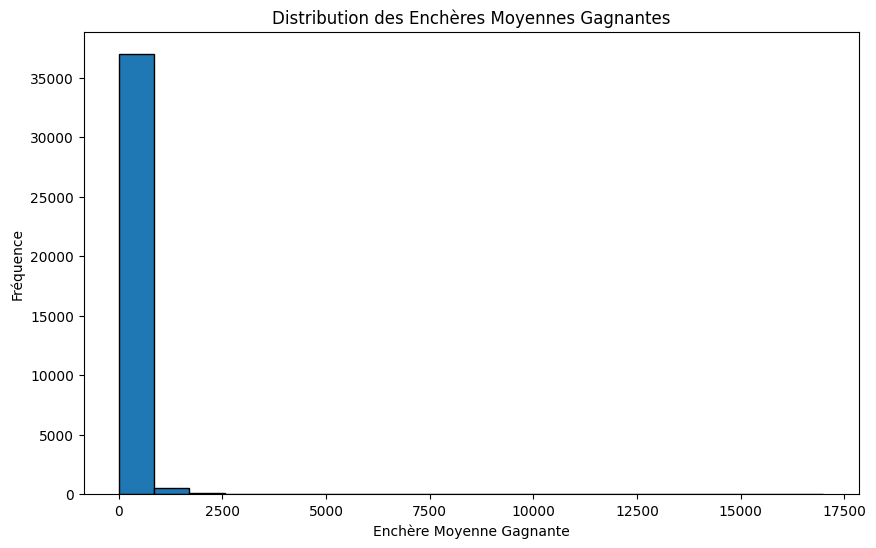

In [1]:
# main.py

import logic
import matplotlib.pyplot as plt
# importez d'autres bibliothèques si nécessaire

# Endpoint pour les données de base
endpoint_base = 'https://whiskyhunter.net/api/distilleries_info/'

# Récupérer les données de base
df_base = logic.fetch_base_data(endpoint_base)

# Récupérer les données détaillées
df_detailed = logic.fetch_detailed_data(df_base['slug'])

# Filtrer le DataFrame de base
df_base_filtered = logic.filter_base_data(df_base, df_detailed)

# Enregistrer le DataFrame détaillé au format JSON
df_detailed.to_json("data.json", orient='split', index=True)

# Analyses statistiques et visualisations
# Exemple : Calculer la moyenne des enchères moyennes gagnantes
mean_winning_bid = df_detailed['winning_bid_mean'].mean()
print("Moyenne des enchères moyennes gagnantes :", mean_winning_bid)

# Exemple de visualisation : Histogramme des enchères moyennes gagnantes
plt.figure(figsize=(10, 6))
plt.hist(df_detailed['winning_bid_mean'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution des Enchères Moyennes Gagnantes')
plt.xlabel('Enchère Moyenne Gagnante')
plt.ylabel('Fréquence')
plt.show()

# Vous pouvez ajouter d'autres analyses et visualisations selon vos besoins
